In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
sucess = df.loc[df["Class"] == 0]
sucess

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
fraud = df.loc[df["Class"]==1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [6]:
print(fraud.shape,sucess.shape)

(492, 31) (284315, 31)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##Visualization

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


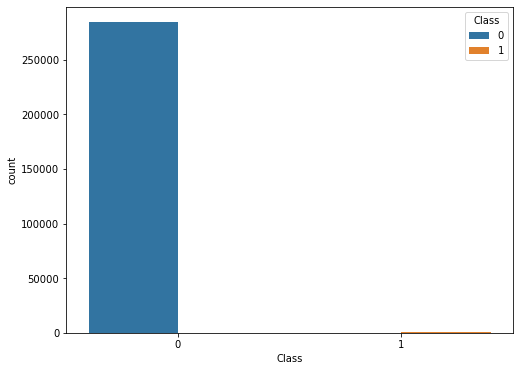

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(df["Class"], hue = df["Class"]);

In [9]:
X = df.iloc[:,:-1]
y = df["Class"]

In [10]:
print(X.shape, y.shape)

(284807, 30) (284807,)


In [11]:
print(fraud.shape,sucess.shape)

(492, 31) (284315, 31)


##Training the data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [13]:
y_test

49089     0
154704    0
67247     0
251657    0
201903    0
         ..
232852    0
227811    0
30905     0
104456    0
86539     0
Name: Class, Length: 56962, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train, y_train)

C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
log_reg.predict_proba(X_test)

array([[9.92023423e-01, 7.97657662e-03],
       [9.99973510e-01, 2.64896728e-05],
       [9.99827153e-01, 1.72847094e-04],
       ...,
       [9.95169307e-01, 4.83069259e-03],
       [9.99919567e-01, 8.04329972e-05],
       [9.99997284e-01, 2.71551845e-06]])

In [17]:
from sklearn import metrics

In [18]:
y_predicted = log_reg.predict(X_test)

In [19]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
metrics.accuracy_score(y_test,y_predicted)

0.9988237772550121

In [21]:
metrics.confusion_matrix(y_test, y_predicted)

array([[56835,    31],
       [   36,    60]], dtype=int64)

Since our dataset is unbalanced, the accuracy score is biased becuase it is modeeled towards successful transaction.So the dataset has to be trained balanced.

# UnderSampling

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
under_sampler = RandomUnderSampler(sampling_strategy = 1)
X_res,y_res = under_sampler.fit_resample(X_train,y_train)

In [25]:
da = y_res.value_counts()
da

1    396
0    396
Name: Class, dtype: int64

In [26]:
y_res

0      0
1      0
2      0
3      0
4      0
      ..
787    1
788    1
789    1
790    1
791    1
Name: Class, Length: 792, dtype: int64

In [27]:
y_test.value_counts()

0    56866
1       96
Name: Class, dtype: int64

In [28]:
log_reg = LogisticRegression()

In [29]:
log_reg.fit(X_res,y_res)

LogisticRegression()

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


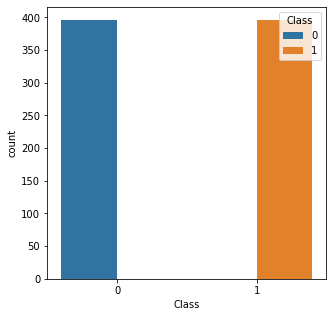

In [30]:
plt.figure(figsize = (5,5))
sns.countplot(y_res, hue = y_res);

In [31]:
y_predicted = log_reg.predict(X_test)

In [32]:
y_predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
from sklearn import metrics

In [34]:
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56866
           1       0.03      0.89      0.06        96

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [35]:
metrics.accuracy_score(y_test,y_predicted)

0.9535479793546575

In [36]:
metrics.confusion_matrix(y_test, y_predicted)

array([[54231,  2635],
       [   11,    85]], dtype=int64)

# Oversampling

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [38]:
y_train.value_counts()

0    227449
1       396
Name: Class, dtype: int64

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
over_sampler = RandomOverSampler(sampling_strategy = 1)
X_smote, y_smote = over_sampler.fit_resample(X_train,y_train)

In [41]:
y_smote.value_counts()

1    227449
0    227449
Name: Class, dtype: int64

In [42]:
log_reg = LogisticRegression()

In [43]:
log_reg.fit(X_smote,y_smote)

LogisticRegression()

C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


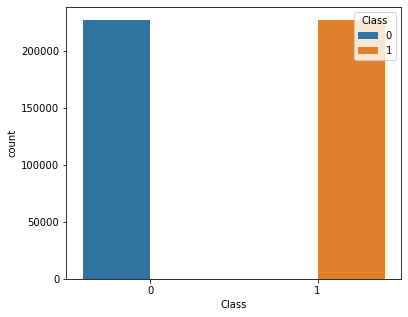

In [44]:
plt.figure(figsize = (6,5))
sns.countplot(y_smote, hue = y_smote);

In [45]:
y_predicted = log_reg.predict(X_test)

In [46]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn import metrics

In [48]:
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56866
           1       0.03      0.88      0.06        96

    accuracy                           0.95     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [49]:
metrics.accuracy_score(y_test,y_predicted)

0.9541799796355465

In [50]:
metrics.confusion_matrix(y_test, y_predicted)

array([[54268,  2598],
       [   12,    84]], dtype=int64)

# Pipeline

In [51]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [52]:
over_sampler = RandomOverSampler(sampling_strategy = 0.1)
under_sampler = RandomUnderSampler(sampling_strategy = 0.5)

In [53]:
from imblearn.pipeline import Pipeline

In [54]:
steps = [("o",over_sampler), ("u", under_sampler)]
pipeline = Pipeline(steps = steps)

In [55]:
X_smote,y_smote = pipeline.fit_resample(X_train,y_train)

In [56]:
log_reg = LogisticRegression()

In [57]:
log_reg.fit(X_smote,y_smote)

LogisticRegression()

In [58]:
y_pred = log_reg.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
metrics.confusion_matrix(y_test, y_pred)

array([[55384,  1482],
       [   16,    80]], dtype=int64)

In [61]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.83      0.10        96

    accuracy                           0.97     56962
   macro avg       0.53      0.90      0.54     56962
weighted avg       1.00      0.97      0.99     56962



In [62]:
metrics.f1_score(y_test,y_pred)

0.0965018094089264

# Cross-Validation

In [63]:
10.0**np.arange(,10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09])

In [64]:
log_reg =LogisticRegression()
grid = {"C" : 10.0**np.arange(1,10),"penalty" : ["l1","l2"]}
cv =KFold(n_splits =10, random_state = None,shuffle = False)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [66]:
clf = GridSearchCV(log_reg,grid,cv = cv, n_jobs = -1, scoring ="f1_weighted","G_mean")
clf.fit(X_train,y_train)

C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\OWNER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [67]:
y_pred = clf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[56834,    32],
       [   35,    61]], dtype=int64)

In [68]:
metrics.accuracy_score(y_test,y_pred)

0.9988237772550121

In [69]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.64      0.65        96

    accuracy                           1.00     56962
   macro avg       0.83      0.82      0.82     56962
weighted avg       1.00      1.00      1.00     56962

